In [1]:
%reload_ext autoreload
%autoreload 2

from  modules import model
import numpy as np
import pomegranate as pg
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time

# Creation of multiple users

To create the full data for the experiment:

    generate_experiment_data(n_users=100, sequence_length=120, up_to=5)
    3.41 s ± 289 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [68]:
N_USERS=100
SEQUENCE_LENGTH=120
UP_TO=5

def generate_experiment_data(n_users=N_USERS, sequence_length=SEQUENCE_LENGTH, up_to=UP_TO):
    models = [None] * n_users
    connections_sequence = np.zeros((sequence_length, n_users, model.DEVICES_NUMBER_MAX), dtype=np.bool)
    # We could make predictions 3D if overwriting previous prediction every turn
    predictions=np.zeros((sequence_length, n_users, model.DEVICES_NUMBER_MAX, up_to), dtype=np.float64)
    
    for user_id in range(n_users):
        m = model.get_random()
        models[user_id] = m

        # Generating sequence of actions for user
        sample_states, sample_obs = m.sample(length=sequence_length)
        connections_sequence[:, user_id, :m.n_obs] = sample_obs

        # Generating predictions
        for seq_id in range(sequence_length):
            for d_id in range(m.n_obs):
                # Only online devices make predictions
                if not sample_obs[seq_id, d_id]:
                    continue


                predictions[seq_id, user_id, d_id, :] = m.predict(
                    up_to=up_to, 
                    obs=d_id, 
                    s_t=sample_states[seq_id])
    
    return connections_sequence, predictions, models

connections_sequence, predictions, models = generate_experiment_data()

In [2]:
N_USERS=100
SEQUENCE_LENGTH=120
UP_TO=5

n_users = N_USERS
sequence_length = SEQUENCE_LENGTH
up_to = UP_TO

columns=['t', 'i', 'device_id', 'p']
address_book = pd.DataFrame(columns=columns)

states_columns=['t', 'user_id', 'state_id']
states_df = pd.DataFrame(columns=states_columns)

models = [None] * n_users

t0 = time.perf_counter()

for user_id in range(n_users):
    start = time.perf_counter()
    
    m = model.get_random()
    models[user_id] = m

    # Generating sequence of actions for user
    sample_states, sample_obs = m.sample(length=sequence_length)
    
    states_df = states_df.append(pd.DataFrame(
        [
            [
                t,
                user_id,
                sample_states[t]
            ] for t in range(sequence_length)
        ], columns=states_columns), ignore_index=True)
    
    for t in range(sequence_length):
         for d_id in range(m.n_obs):
            # Only online devices make predictions
            if not sample_obs[t, d_id]:
                continue
                
            address_book = address_book.append(
                pd.Series(
                    {'t': t, 
                     'i': 0,
                     'device_id': models[user_id].observations[d_id], 
                     'p': 1}
                ), ignore_index=True)
            
            address_book = address_book.append(pd.DataFrame(
                [
                    [
                        t, i+1,
                        m.observations[d_id],
                        p
                    ] for i, p in enumerate(m.predict(up_to=up_to, obs=d_id, s_t=sample_states[t]))
                ], columns=columns), ignore_index=True)
            
            pred=np.empty((up_to, ))
    
    print("User #{} / {} done in {:.1f}s".format(user_id+1, n_users, time.perf_counter() - start))

total_time = time.perf_counter() - t0
m = total_time//60
s = total_time - m * 60
print("All done in {:.0f}m {:.1f}s".format(m, s))

            
address_book

User #1 / 100 done in 3.9s
User #2 / 100 done in 1.8s
User #3 / 100 done in 4.4s
User #4 / 100 done in 2.4s
User #5 / 100 done in 4.5s
User #6 / 100 done in 2.5s
User #7 / 100 done in 2.0s
User #8 / 100 done in 7.0s
User #9 / 100 done in 2.7s
User #10 / 100 done in 3.5s
User #11 / 100 done in 3.4s
User #12 / 100 done in 8.1s
User #13 / 100 done in 7.5s
User #14 / 100 done in 4.0s
User #15 / 100 done in 7.6s
User #16 / 100 done in 7.9s
User #17 / 100 done in 5.9s
User #18 / 100 done in 13.7s
User #19 / 100 done in 5.9s
User #20 / 100 done in 4.7s
User #21 / 100 done in 5.9s
User #22 / 100 done in 5.0s
User #23 / 100 done in 13.6s
User #24 / 100 done in 12.4s
User #25 / 100 done in 12.1s
User #26 / 100 done in 11.2s
User #27 / 100 done in 6.1s
User #28 / 100 done in 13.7s
User #29 / 100 done in 9.8s
User #30 / 100 done in 17.8s
User #31 / 100 done in 6.3s
User #32 / 100 done in 13.3s
User #33 / 100 done in 13.3s
User #34 / 100 done in 15.4s
User #35 / 100 done in 10.9s
User #36 / 100 don

,device_id,i,p,t,time
0,vd4p0p9sbk1njfsp_mobile,NaN,1.000000,NaN,0.0
1,vd4p0p9sbk1njfsp_mobile,1,0.973576,0,NaN
2,vd4p0p9sbk1njfsp_mobile,2,0.969701,0,NaN
3,vd4p0p9sbk1njfsp_mobile,3,0.964612,0,NaN
4,vd4p0p9sbk1njfsp_mobile,4,0.961006,0,NaN
5,vd4p0p9sbk1njfsp_mobile,5,0.958731,0,NaN
6,ydgsfhwkizcvxbzu_server,NaN,1.000000,NaN,0.0
7,ydgsfhwkizcvxbzu_server,1,0.938827,0,NaN
8,ydgsfhwkizcvxbzu_server,2,0.938827,0,NaN
9,ydgsfhwkizcvxbzu_server,3,0.938827,0,NaN


In [29]:
states_df=pd.DataFrame(states_df, dtype=np.int)

In [30]:
states_df

,t,user_id,state_id
0,0,0,2
1,1,0,2
2,2,0,2
3,3,0,2
4,4,0,2
5,5,0,1
6,6,0,2
7,7,0,2
8,8,0,1
9,9,0,1


In [31]:
states_df.to_csv('outputs/experiment/states.csv')

In [88]:
n_users = connections_sequence.shape[1]
sequence_length = connections_sequence.shape[0]
up_to = UP_TO

n_devices = 0
for m in models:
    n_devices += m.n_obs

columns=['time', 'device_id', 'p']
address_book = pd.DataFrame(columns=columns)
for t, (connection, prediction) in enumerate(zip(connections_sequence, predictions)):
    print(connection.shape)
    print(prediction.shape)
    
    address_book = address_book[address_book['time'] >= t]
    
    for user_id in range(n_users):
        for d_id in np.where(connection[user_id])[0]:
            
            address_book = address_book.append(pd.Series(
                {'time': t, 
                 ''
                 'device_id': models[user_id].observations[d_id], 
                 'p': 1}
                ), ignore_index=True)
            
            address_book = address_book.append(pd.DataFrame(
                [
                    [
                        t+i, 
                        models[user_id].observations[d_id], 
                        prediction[user_id, d_id, i-1]
                    ] for i in range(1, up_to+1)
                ], 
                columns=columns), ignore_index=True)
            
            
    
    print(address_book)
    if t == 1:
        break

(100, 10)
(100, 10, 5)
      time                  device_id         p
0      0.0    hdu4tf46aovrq696_mobile  1.000000
1      1.0    hdu4tf46aovrq696_mobile  0.909586
2      2.0    hdu4tf46aovrq696_mobile  0.897282
3      3.0    hdu4tf46aovrq696_mobile  0.885765
4      4.0    hdu4tf46aovrq696_mobile  0.878028
5      5.0    hdu4tf46aovrq696_mobile  0.873220
6      0.0  kljnrf2djjm8y7ge_portable  1.000000
7      1.0  kljnrf2djjm8y7ge_portable  0.370772
8      2.0  kljnrf2djjm8y7ge_portable  0.374954
9      3.0  kljnrf2djjm8y7ge_portable  0.390180
10     4.0  kljnrf2djjm8y7ge_portable  0.401859
11     5.0  kljnrf2djjm8y7ge_portable  0.409374
12     0.0    ggmjjjpgszsz72ai_server  1.000000
13     1.0    ggmjjjpgszsz72ai_server  0.911019
14     2.0    ggmjjjpgszsz72ai_server  0.911019
15     3.0    ggmjjjpgszsz72ai_server  0.911019
16     4.0    ggmjjjpgszsz72ai_server  0.911019
17     5.0    ggmjjjpgszsz72ai_server  0.911019
18     0.0    zyhd2hhzkaclize8_server  1.000000
19     1.0    zyh

# The Model: creation, generation of behavior, prediction

In [96]:
states_name=["Home", "Outside", "Work"]
obs_name=["Phone", "Home computer", "NAS", "Workstation", "Laptop"]
n_states=len(states_name)
n_obs=len(obs_name)
m=model.Model()
m.set(
[[0.5,0.5,0],
 [0.3,0.4,0.3],
 [0,0.5,0.5]],
[[0.9, 0.4, 0.99, 0.1, 0.7],
 [0.9, 0.1, 0.99, 0.1, 0.2],
 [0.7, 0.1, 0.99, 0.7, 0.3]],
states_name, obs_name)

## Generating behavior

In [95]:
states,obs=m.sample()
for s, o in zip(states, obs):
    print(states_name[s], [obs_name[i] for i in range(len(obs_name)) if o[i]])

Home ['Phone', 'Home computer', 'NAS', 'Workstation', 'Laptop']
Outside ['Phone', 'Home computer', 'NAS']
Outside ['Phone', 'NAS', 'Laptop']
Work ['Phone', 'NAS', 'Workstation', 'Laptop']
Outside ['Phone', 'NAS']
Outside ['Phone', 'NAS']
Work ['Phone', 'NAS', 'Workstation']
Outside ['Phone', 'NAS']
Outside ['Phone', 'NAS']
Outside ['Phone', 'NAS']
Home ['NAS']
Home ['Phone', 'NAS', 'Workstation', 'Laptop']
Home ['Phone', 'NAS', 'Laptop']
Home ['Phone', 'NAS', 'Laptop']
Home ['NAS']
Home ['Phone', 'Home computer', 'NAS', 'Laptop']
Home ['NAS', 'Laptop']
Home ['Phone', 'NAS']
Home ['NAS', 'Laptop']
Outside ['Phone', 'NAS']


## Plot predictions

In [97]:
UP_TO=10
predictions=np.empty((n_states, n_obs, UP_TO), dtype=np.float64)

for obs_id, obs in enumerate(obs_name):
    predictions[:, obs_id,:]=m.predict(UP_TO, obs_id).T

['t + 1', 't + 2', 't + 3', 't + 4', 't + 5', 't + 6', 't + 7', 't + 8', 't + 9', 't + 10']





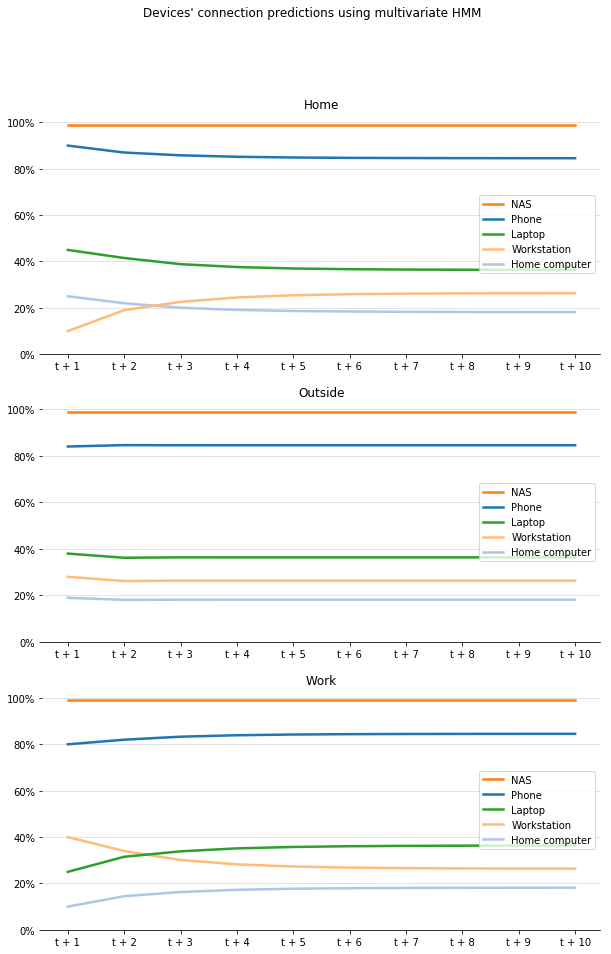

In [110]:
fig, axarr = plt.subplots(ncols=1, nrows=n_states, figsize=(10,15))
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

sns.despine(fig=fig, left=True)

time_labels = ['t + '+str(i) for i in range(1, UP_TO+1)]
print(time_labels)
time_indices = range(UP_TO)

for s_id, state in enumerate(states_name):
    ax=axarr[s_id]
    ax.set_title(state)
    
    for obs_id, obs in enumerate(obs_name):
        line = ax.plot(time_indices,
                        predictions[s_id, obs_id,:],
                        lw=2.5,
                        color=color_sequence[obs_id],
                        label=obs)
    print()
    
    ax.set_xticks(time_indices)
    ax.set_xticklabels(time_labels)
    
    ax.set_yticks(np.arange(0, 1.01, 0.2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
    ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    
    # Sort the legend items
    handles, labels = ax.get_legend_handles_labels()
    handles, labels, _ = zip(*sorted(zip(handles, labels, predictions[s_id, :,UP_TO-1]),
                                     key=lambda t: t[2],
                                     reverse=True))
    ax.legend(handles, labels, loc='center right')

plt.suptitle("Devices' connection predictions using multivariate HMM")
plt.savefig(filename="outputs/connection_predictions_multivariate_hmm.pdf")
plt.show()

In [92]:
import random

random.randint(3, 4)

3

## Where it fails: inferring model from data

In [49]:
default_m=model.get_default_model(m.observations)

In [52]:
default_m.fit(obs)

Observation Phone
Sequence:
['Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'non_Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'non_Phone', 'non_Phone', 'Phone', 'non_Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'Phone', 'non_Phone', 'Phone']
A:
